In [2]:
# Imports
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
% matplotlib inline

In [59]:
# Sigmoid aka Logistic Function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [56]:
# Function to compute log_likelihood, given some X, y, and Betas
def log_likelihood(X, y, beta):
    # Compute predicted p_i for all P(Class 1)
    p1 = X.map(lambda x: sigmoid(np.dot(beta, np.array([1, x]))))
    # Predictied P(Class 0)
    p0 = 1 - p1
    # Keep the p1 for when y==1, p0 for when y==0
    p = pd.concat([p1[y==1], p0[y==0]], axis=0)
    # Compute the log
    logp = np.log(p)
    # Add them all together for total log-likelihood
    return logp.sum()

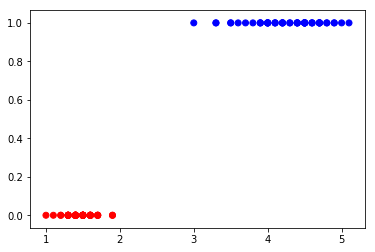

In [149]:
# Download Iris data
iris = load_iris()
X = pd.Series(iris.data[0:100, 2])
y = pd.Series(iris.target[0:100])
plt.scatter(X, y, c=y.map({0: 'r', 1: 'b'}))

In [150]:
# Plot the sigmoid and data points for specific betas
def plot_results(X, y, beta, ax):
    ax.scatter(X, y, c=y.map({0: 'r', 1: 'b'}))
    x_plot = np.linspace(X.min()-2, X.max()+2, 100)
    y_plot = pd.Series(x_plot).map(lambda val: sigmoid(np.dot(beta, np.array([1, val]))))
    ax.plot(x_plot, y_plot)
    ax.set_title('Log-Likelihood: %.2f\n' % (log_likelihood(X, y, beta)) + 'Beta 0: {}\n'.format(beta[0]) + 'Beta 1: {}'.format(beta[1]))

In [100]:
# Trial betas to try
beta0 = np.arange(-5, 0, 1)
beta1 = np.arange(0, 5, 1)

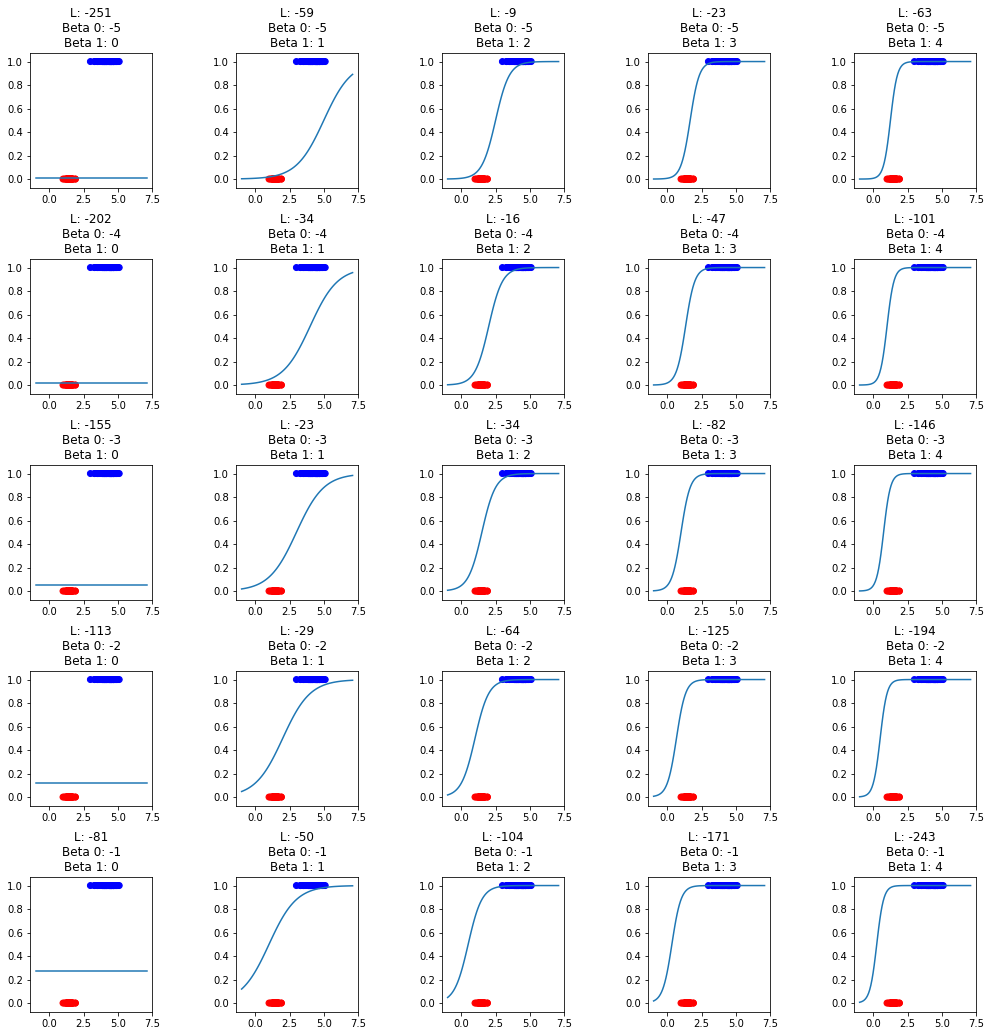

In [138]:
# Trying out all different combos of betas
fig, ax = plt.subplots(len(beta0), len(beta1), figsize=(3*len(beta1), len(beta1)*len(beta0)*.6))
fig.tight_layout(pad=5)
for i, b0 in enumerate(beta0):
    for j, b1 in enumerate(beta1):
        plot_results(X, y, np.array([b0, b1]), ax[i][j])

In [62]:
from sklearn.linear_model import LogisticRegression

In [167]:
# Try fitting a NON-regularized Logistic Regression to get the Maximum Likelihood answer
# The parameter C is the inverse of regularization strength, so lower values are more regularization
lr_no_regularization = LogisticRegression(C = 100000000000000)
lr_no_regularization.fit(pd.DataFrame(X), y)

LogisticRegression(C=100000000000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [164]:
# This is Beta_1
lr_no_regularization.coef_

array([[ 13.41436065]])

In [165]:
# This is Beta_0
lr_no_regularization.intercept_

array([-33.37453097])

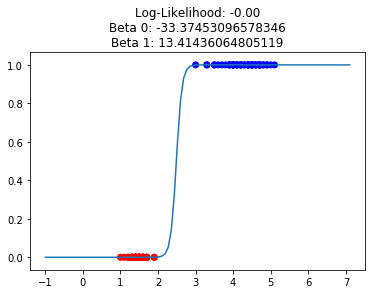

In [166]:
# See what those beta values look like for the NON regularized model
fig2, ax2 = plt.subplots(1, 1)
plot_results(X, y, np.array([lr_no_regularization.intercept_[0], lr_no_regularization.coef_[0]]), ax2)

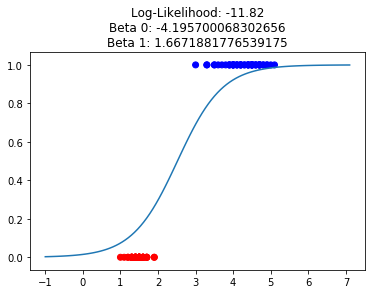

In [168]:
# Now if we leave the regularization in
lr_regularization = LogisticRegression()
lr_regularization.fit(pd.DataFrame(X), y)
# This is Beta_1
lr_regularization.coef_
# This is Beta_0
lr_regularization.intercept_
# See what those beta values look like for the NON regularized model
fig3, ax3 = plt.subplots(1, 1)
plot_results(X, y, np.array([lr_regularization.intercept_[0], lr_regularization.coef_[0]]), ax3)